In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

---
## Donchian Channel Example
---

In [2]:
import pandas as pd
import mplfinance as mpf

In [3]:
#Data Used In This Example
df = pd.read_csv('data/nse:tcs.csv', index_col=0, parse_dates=True)

# Calculate the Donchin Channel:
df['DCU_15']    =  df['High'].rolling(15).max()
df['DCL_10']    =  df['Low'].rolling(10).min()
df['DCM_10_15'] = (df['DCU_15'] + df['DCL_10']) / 2

df = df.iloc[15:,:]  # skip larger rolling period, so rolling valuea start at beginning.

In [4]:
DCU = df['DCU_15']
DCM = df['DCM_10_15']
DCL = df['DCL_10']

In [5]:
apds = [mpf.make_addplot(DCU,color='#2962FF',panel=0,),
        mpf.make_addplot(DCM,color='#FF6D00',panel=0,),
        mpf.make_addplot(DCL,color='#2962FF',panel=0,),
       ]

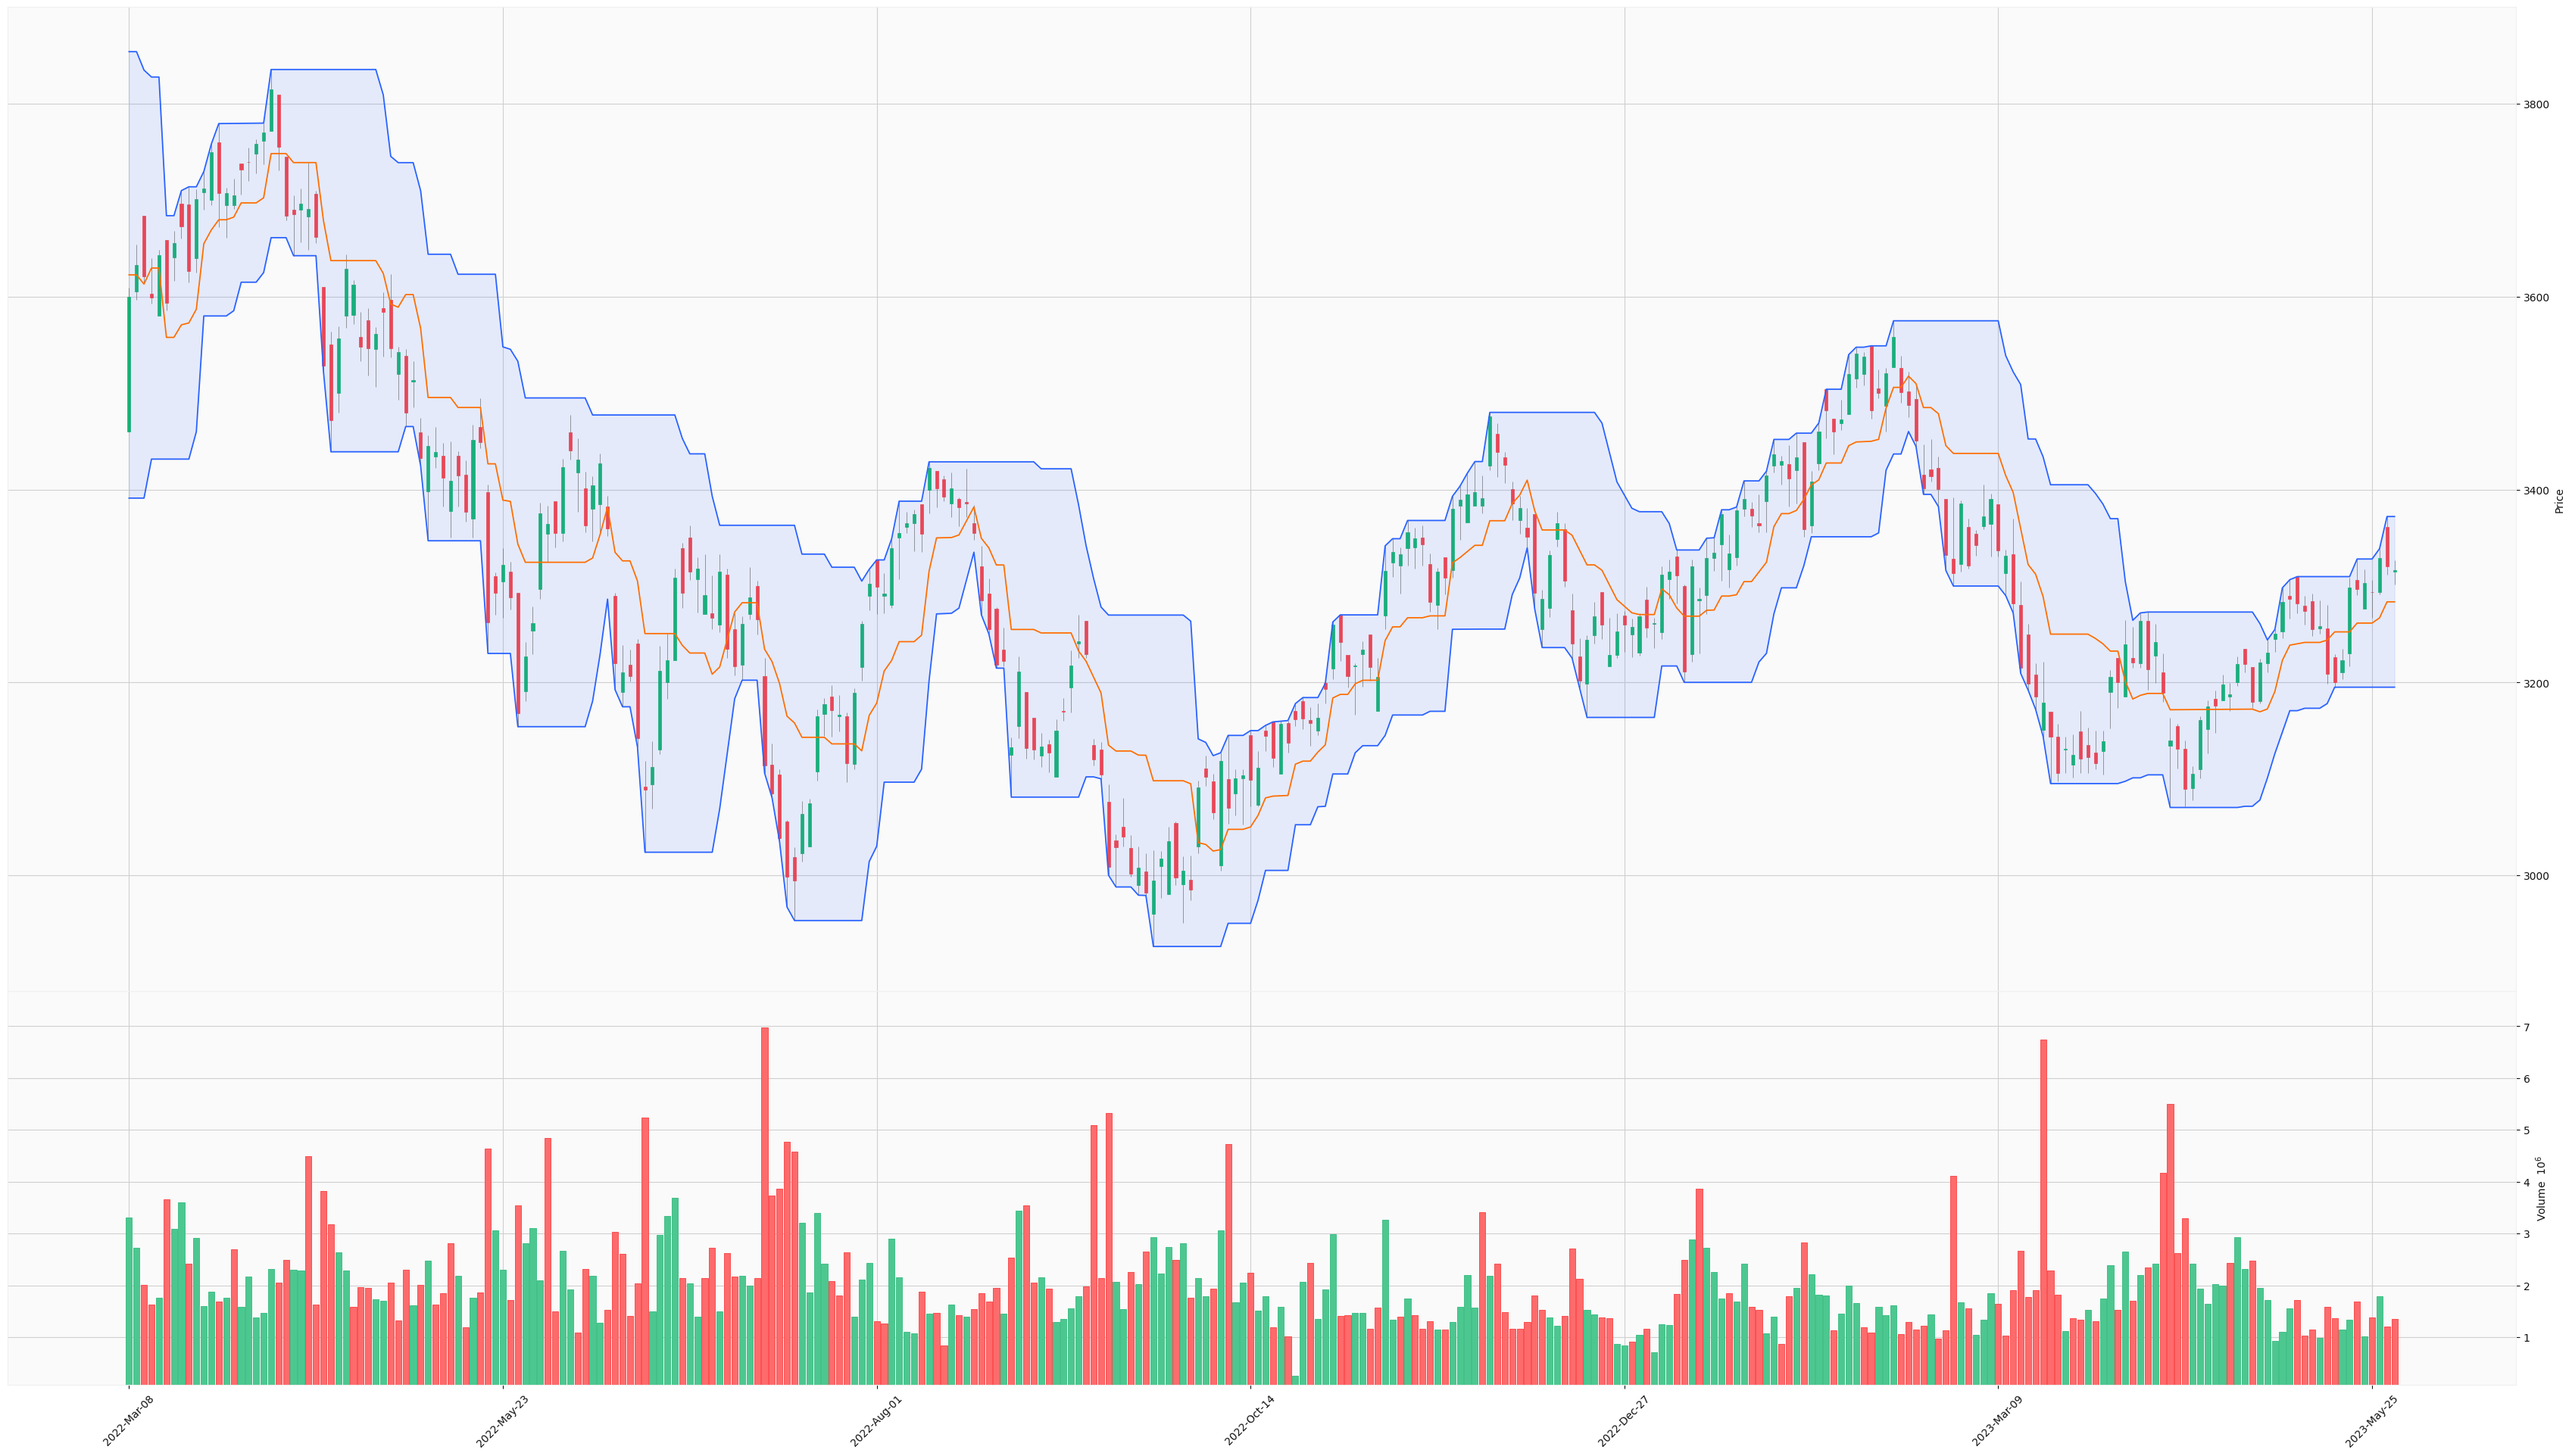

In [6]:
mpf.plot(df,
         volume=True,
         type="candle",
         fill_between=dict(y1=DCU.values,y2=DCL.values,alpha=0.1,color='#2962FF'),
         style="yahoo",
         addplot=apds,
         figsize=(46,26)
        )